In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('./data.csv')

X = df[['SLPG005', 'GEN_020', 'EHG2DVR3', 'GEN_005', 'FSCDVAFS']].values
y = df['GEN_015'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                384       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2497 (9.75 KB)
Trainable params: 2497 (9.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)



Epoch 1/100
68/68 [==============================] - 1s 3ms/step - loss: 0.5190 - accuracy: 0.7255 - val_loss: 0.3446 - val_accuracy: 0.9131
Epoch 2/100
68/68 [==============================] - 0s 1ms/step - loss: 0.1809 - accuracy: 0.9921 - val_loss: 0.0631 - val_accuracy: 1.0000
Epoch 3/100
68/68 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 1.0000 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 4/100
68/68 [==============================] - 0s 1ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 5/100
68/68 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 6/100
68/68 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 7/100
68/68 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 8/100
6

In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")


22/22 [==============================] - 0s 788us/step - loss: 6.3680e-07 - accuracy: 1.0000
Test Accuracy: 1.0


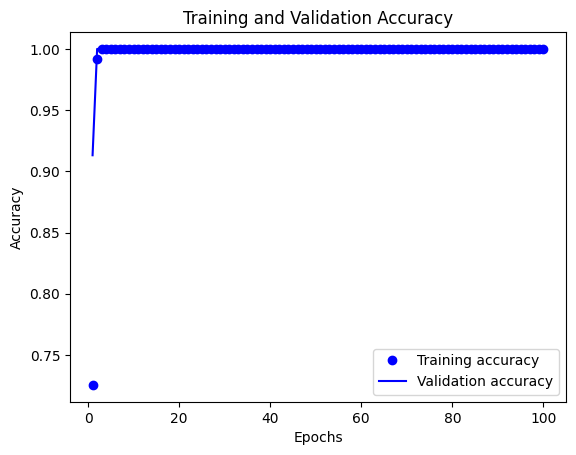

In [16]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
